<a href="https://colab.research.google.com/github/muscak/Master-Machine-Learning-Algorithms/blob/master/Nonlinear-Algorithms/Learning-Vector-Quantization/Learning_Vector_Quantization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Learning Vector Quantization (LVQ)

In [85]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style('whitegrid')

In [2]:
x1 = [3.393533211, 3.110073483, 1.343808831, 3.582294042, 2.280362439, 
      7.423436942, 5.745051997, 9.172168622, 7.792783481, 7.939820817]
x2 = [2.331273381, 1.781539638, 3.368360954, 4.67917911, 2.866990263, 
      4.696522875, 3.533989803, 2.511101045, 3.424088941, 0.791637231]
y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

df = pd.DataFrame(zip(x1, x2, y), columns=['x1', 'x2', 'y'])
df

,x1,x2,y
0,3.393533,2.331273,0
1,3.110073,1.781540,0
2,1.343809,3.368361,0
3,3.582294,4.679179,0
4,2.280362,2.866990,0
5,7.423437,4.696523,1
6,5.745052,3.533990,1
7,9.172169,2.511101,1
8,7.792783,3.424089,1
9,7.939821,0.791637,1


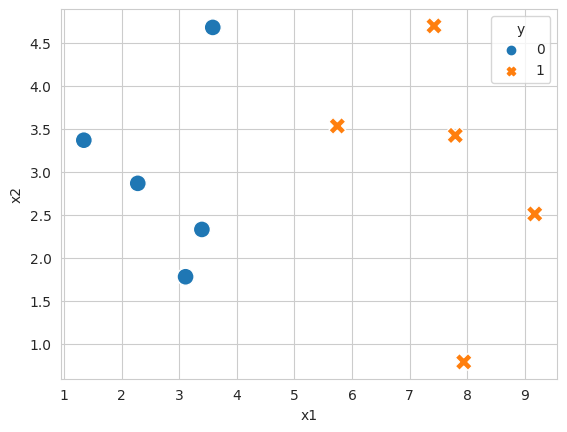

In [3]:
sb.scatterplot(data=df, x='x1', y='x2', hue='y', style='y', s=150)
plt.show()

,x1,x2,y
0,9.172169,2.511101,1
1,1.343809,3.368361,0
2,7.939821,0.791637,1
3,7.792783,3.424089,1


In [107]:
def create_temp_df(learning_rate, df_index, codebook_vector):
  df_temp = pd.DataFrame(columns=['x1', 'x2', 'y', 'input_x1', 'input_x2', 'input_y', 'Distance', 'Is_BMU', 'new_x1', 'new_x2'])
  df_temp['x1'] = codebook_vector['x1']
  df_temp['x2'] = codebook_vector['x2']
  df_temp['y'] = codebook_vector['y']

  for i in range(0, len(codebook_vector)):
    df_temp['input_x1'] = df.loc[df_index, 'x1']
    df_temp['input_x2'] = df.loc[df_index, 'x2']
    df_temp['input_y'] = df.loc[df_index, 'y']

  df_temp['Distance'] = np.sqrt(np.square(df_temp['x1'] - df_temp['input_x1']) 
    + np.square(df_temp['x2'] - df_temp['input_x2']))

  min = df_temp['Distance'].min()
  df_temp.loc[df_temp['Distance'] == min, 'Is_BMU'] = 'BMU'
  df_temp.loc[df_temp['Distance'] != min, 'Is_BMU'] = 'NO'

  df_temp.loc[df_temp['Is_BMU'] == 'BMU', 'new_x1'] = df_temp['x1'] + learning_rate*(df_temp['input_x1'] - df_temp['x1'])
  df_temp.loc[df_temp['Is_BMU'] == 'NO', 'new_x1'] = df_temp['x1'] - learning_rate*(df_temp['input_x1'] - df_temp['x1'])
  df_temp.loc[df_temp['Is_BMU'] == 'BMU', 'new_x2'] = df_temp['x2'] + learning_rate*(df_temp['input_x2'] - df_temp['x2'])
  df_temp.loc[df_temp['Is_BMU'] == 'NO', 'new_x2'] = df_temp['x2'] - learning_rate*(df_temp['input_x2'] - df_temp['x2'])

  return df_temp

In [115]:
def train(learning_rate, nr_codebook_vector, iter):
  # Creating codebook vector by randomly selecting samples from dataset 
  df_codebook_vector = df.sample(n = nr_codebook_vector).reset_index(drop=True)

  df_training = pd.DataFrame(columns=['x1', 'x2', 'y', 'input_x1', 'input_x2', 'input_y', 'Distance', 'Is_BMU', 'new_x1', 'new_x2'])
  df_temp = create_temp_df(learning_rate, 0, df_codebook_vector)
  df_training = pd.concat([df_training, df_temp], ignore_index=True)

  for i in range(1, iter):
    new_codebook_vector = df_temp[['new_x1', 'new_x2', 'y']]
    new_codebook_vector.rename(columns={'new_x1': 'x1', 'new_x2': 'x2'}, inplace=True)
    new_codebook_vector['x1'] = pd.to_numeric(new_codebook_vector['x1'], errors='coerce')
    new_codebook_vector['x2'] = pd.to_numeric(new_codebook_vector['x2'], errors='coerce')

    df_temp = create_temp_df(learning_rate, i, new_codebook_vector)
    df_training = pd.concat([df_training, df_temp], ignore_index=True)
  
  return df_training

In [119]:
nr_codebook_vector = 4
df_training = train(0.7, nr_codebook_vector, 10)
df_trained_codebook_vector = pd.DataFrame(columns=['x1', 'x2', 'y'])
df_trained_codebook_vector['x1'] = df_training.loc[len(df_training)-nr_codebook_vector:len(df_training),'x1']
df_trained_codebook_vector['x2'] = df_training.loc[len(df_training)-nr_codebook_vector:len(df_training),'x2']
df_trained_codebook_vector['y'] = df_training.loc[len(df_training)-nr_codebook_vector:len(df_training),'y']

In [120]:
df_trained_codebook_vector

,x1,x2,y
36,561.362505,-219.997734,1
37,7.903839,3.261980,1
38,707.504014,-16.090172,1
39,500.125638,243.074362,1


In [121]:
df_training

,x1,x2,y,input_x1,input_x2,input_y,Distance,Is_BMU,new_x1,new_x2
0,7.939821,0.791637,1,3.393533,2.331273,0,4.799918,NO,11.122222,-0.286108
1,7.792783,3.424089,1,3.393533,2.331273,0,4.532951,BMU,4.713308,2.659118
2,9.172169,2.511101,1,3.393533,2.331273,0,5.781433,NO,13.217213,2.63698
3,7.423437,4.696523,1,3.393533,2.331273,0,4.672743,NO,10.24437,6.352198
4,11.122222,-0.286108,1,3.110073,1.781540,0,8.274642,NO,16.730726,-1.733461
5,4.713308,2.659118,1,3.110073,1.781540,0,1.827705,BMU,3.591044,2.044813
6,13.217213,2.636980,1,3.110073,1.781540,0,10.143276,NO,20.292211,3.235789
7,10.244370,6.352198,1,3.110073,1.781540,0,8.472844,NO,15.238377,9.551658
8,16.730726,-1.733461,1,1.343809,3.368361,0,16.210670,NO,27.501568,-5.304737
9,3.591044,2.044813,1,1.343809,3.368361,0,2.608035,BMU,2.017979,2.971297
